# HOG Gradient Filter Demo (1st Derivative)

This project demonstrates how to apply a **1D first-derivative filter** `[-1, 0, 1]` to a grayscale image using NumPy and SciPy. This simulates the gradient computation step in **Histogram of Oriented Gradients (HOG)** descriptor, as described in the original HOG paper.

## Concept

In the HOG algorithm, the first step is to compute the gradient of the image in both **x (horizontal)** and **y (vertical)** directions. This is commonly done using the kernel:

- X-direction kernel: `[-1, 0, 1]`
- Y-direction kernel: the transpose of the above → `[[−1], [0], [1]]`

This simple central difference approximates the partial derivatives of intensity across pixels.

## Example: 3×3 Grayscale Image 

(2D array)



### 1. Install fundamental module

In [2]:
!pip install numpy

   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.3 MB 2.8 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/12.3 MB 3.1 MB/s eta 0:00:04
   ------- -------------------------------- 2.4/12.3 MB 3.2 MB/s eta 0:00:04
   --------- ------------------------------ 2.9/12.3 MB 3.2 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/12.3 MB 3.3 MB/s eta 0:00:03
   -------------- ------------------------- 4.5/12.3 MB 3.4 MB/s eta 0:00:03
   ---------------- ----------------------- 5.0/12.3 MB 3.2 MB/s eta 0:00:03
   ----------------- ---------------------- 5.5/12.3 MB 3.1 MB/s eta 0:00:03
   ------------------- -------------------- 6.0/12.3 MB 3.1 MB/s eta 0:00:03
   ---------------------- ----------------- 6.8/12.3 MB 3.1 MB/s eta 0:00:02
   ----------------------- ---------------- 7.3/12.3 MB 3.1 MB/s eta 0:00:02
   ----------

In [4]:
!pip install scipy

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.6 MB 3.1 MB/s eta 0:00:12
   - -------------------------------------- 1.8/38.6 MB 3.5 MB/s eta 0:00:11
   -- ------------------------------------- 2.4/38.6 MB 3.3 MB/s eta 0:00:12
   --- ------------------------------------ 3.1/38.6 MB 3.4 MB/s eta 0:00:11
   ---- ----------------------------------- 3.9/38.6 MB 3.4 MB/s eta 0:00:11
   ---- ----------------------------------- 4.7/38.6 MB 3.5 MB/s eta 0:00:10
   ----- ---------------------------------- 5.5/38.6 MB 3.5 MB/s eta 0:00:10
   ------ --------------------------------- 6.6/38.6 MB 3.6 MB/s eta 0:00:09
   ------- -------------------------------- 7.3/38.6 MB 3.6 MB/s eta 0:00:09
   ------- -------------------------------- 7.6/38.6 MB 3.6 MB/s eta 0:00:09
   -------- ------------------------------- 8.4/38.6 MB 3.4 MB/s eta 0:00:09
   --------- 

In [3]:
!pip install opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.0/39.0 MB 3.0 MB/s eta 0:00:13
   - -------------------------------------- 1.6/39.0 MB 2.9 MB/s eta 0:00:13
   -- ------------------------------------- 2.4/39.0 MB 3.1 MB/s eta 0:00:13
   --- ------------------------------------ 3.1/39.0 MB 3.1 MB/s eta 0:00:12
   ---- ----------------------------------- 3.9/39.0 MB 3.4 MB/s eta 0:00:11
   ---- ----------------------------------- 4.7/39.0 MB 3.4 MB/s eta 0:00:11
   ----- ---------------------------------- 5.2/39.0 MB 3.3 MB/s eta 0:00:11
   ------ --------------------------------- 6.0/39.0 MB 3.4 MB/s eta 0:00:10
   ------ --------------------------------- 6.8/39.0 MB 3.4 MB/s eta 0:00:10
   -------

ERROR: Could not install packages due to an OSError: [WinError 32] 다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다: 'C:\\Users\\kkm50\\miniconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
!python -m pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 3.2 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 3.4 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 3.6 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 3.5 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 3.5 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 3.6 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 3.6 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 3.5 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 3.3 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 3.3 MB/s eta 0:00:01
   ----------------------------

### 2. Code

In [14]:
import numpy as np
from scipy.signal import convolve2d

# Example 3x3 grayscale image
img = np.array([
    [80, 90, 100],
    [110, 120, 130],
    [140, 150, 160]
], dtype=np.float32)

# Define 1D derivative kernels
kernel_x = np.array([[-1, 0, 1]], dtype=np.float32)       # Horizontal
kernel_y = kernel_x.T                                     # Vertical

# Apply convolution with zero-padding
Gx = convolve2d(img, kernel_x, mode='same', boundary='fill', fillvalue=0)
Gy = convolve2d(img, kernel_y, mode='same', boundary='fill', fillvalue=0)

print("Gx:\n", Gx)
print("Gy:\n", Gy)


Gx:
 [[ -90.  -20.   90.]
 [-120.  -20.  120.]
 [-150.  -20.  150.]]
Gy:
 [[-110. -120. -130.]
 [ -60.  -60.  -60.]
 [ 110.  120.  130.]]


1080 1920


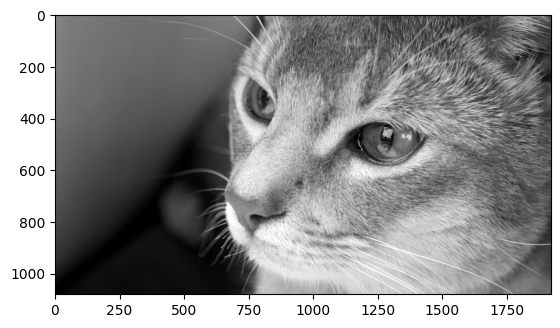

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# image source: https://pixabay.com/images/search/gray-scale/?utm_source=chatgpt.com
src = cv2.imread('../../Source/cat-825302_1920.jpg', cv2.IMREAD_GRAYSCALE)
h, w = src.shape[:2]
print(h, w)
plt.imshow(src, cmap='gray')
plt.show()

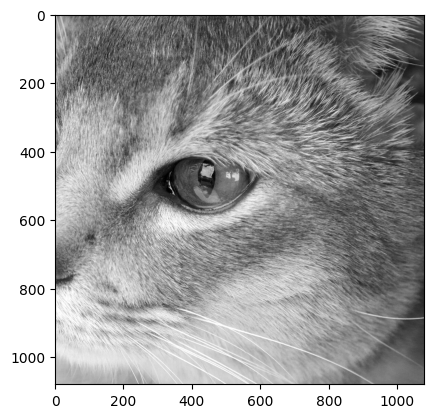

In [12]:
src_cropped = src[:, w-h:]
plt.imshow(src_cropped, cmap='gray')
plt.show()

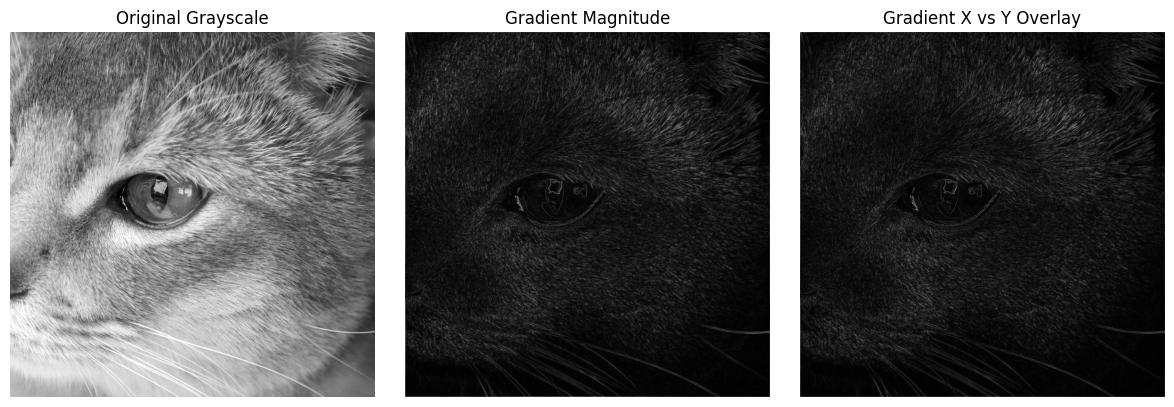

In [15]:
img = src_cropped.copy()
img = img.astype(np.float32)

# Define 1D derivative kernels
kernel_x = np.array([[-1, 0, 1]], dtype=np.float32)       # Horizontal
kernel_y = kernel_x.T                                     # Vertical

# Apply convolution with zero-padding
Gx = convolve2d(img, kernel_x, mode='same', boundary='fill', fillvalue=0)
Gy = convolve2d(img, kernel_y, mode='same', boundary='fill', fillvalue=0)

# Magnitude
magnitude = np.sqrt(Gx**2 + Gy**2)

# Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Gradient Magnitude")
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Gradient X vs Y Overlay")
plt.imshow(np.abs(Gx) + np.abs(Gy), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()